In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('netflix.csv')

In [ ]:
data = df.copy() # made a copy of original dataframe and stored in variable named data.

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info() # to check data type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.isnull().sum() #count of null values in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.shape

(8807, 12)

8807 rows and 12 columns in original dataframe.

# Basic Analysis
# 1. Unnesting the Columns

In [ ]:
df['listed_in']=df['listed_in'].str.split(',')
df['listed_in']

0                                         [Documentaries]
1       [International TV Shows,  TV Dramas,  TV Myste...
2       [Crime TV Shows,  International TV Shows,  TV ...
3                               [Docuseries,  Reality TV]
4       [International TV Shows,  Romantic TV Shows,  ...
                              ...                        
8802                   [Cult Movies,  Dramas,  Thrillers]
8803           [Kids' TV,  Korean TV Shows,  TV Comedies]
8804                           [Comedies,  Horror Movies]
8805                [Children & Family Movies,  Comedies]
8806    [Dramas,  International Movies,  Music & Music...
Name: listed_in, Length: 8807, dtype: object

In [ ]:
df=df.explode('listed_in').reset_index(drop=True)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


In [ ]:
df['country']=df['country'].str.split(',')
df['country']


0        [United States]
1         [South Africa]
2         [South Africa]
3         [South Africa]
4                    NaN
              ...       
19318    [United States]
19319    [United States]
19320            [India]
19321            [India]
19322            [India]
Name: country, Length: 19323, dtype: object

In [ ]:
df=df.explode('country').reset_index(drop=True)

In [ ]:
df['director']=df['director'].str.split(',')
df['director']

0        [Kirsten Johnson]
1                      NaN
2                      NaN
3                      NaN
4        [Julien Leclercq]
               ...        
23759       [Peter Hewitt]
23760       [Peter Hewitt]
23761        [Mozez Singh]
23762        [Mozez Singh]
23763        [Mozez Singh]
Name: director, Length: 23764, dtype: object

In [ ]:
df=df.explode('director').reset_index(drop=True)

In [ ]:
df['cast']=df['cast'].str.split(',')
df['cast']

0                                                      NaN
1        [Ama Qamata,  Khosi Ngema,  Gail Mabalane,  Th...
2        [Ama Qamata,  Khosi Ngema,  Gail Mabalane,  Th...
3        [Ama Qamata,  Khosi Ngema,  Gail Mabalane,  Th...
4        [Sami Bouajila,  Tracy Gotoas,  Samuel Jouy,  ...
                               ...                        
25895    [Tim Allen,  Courteney Cox,  Chevy Chase,  Kat...
25896    [Tim Allen,  Courteney Cox,  Chevy Chase,  Kat...
25897    [Vicky Kaushal,  Sarah-Jane Dias,  Raaghav Cha...
25898    [Vicky Kaushal,  Sarah-Jane Dias,  Raaghav Cha...
25899    [Vicky Kaushal,  Sarah-Jane Dias,  Raaghav Cha...
Name: cast, Length: 25900, dtype: object

In [ ]:
df=df.explode('cast').reset_index(drop=True)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


# 2. Handling Null Values

In [ ]:
df['director'].fillna('Unknown Director', inplace=True)
df['director']

0          Kirsten Johnson
1         Unknown Director
2         Unknown Director
3         Unknown Director
4         Unknown Director
                ...       
202060         Mozez Singh
202061         Mozez Singh
202062         Mozez Singh
202063         Mozez Singh
202064         Mozez Singh
Name: director, Length: 202065, dtype: object

In [ ]:
df['cast'].fillna('Unknown Cast', inplace=True)

In [ ]:
df['country'].fillna('Unknown Country', inplace=True)
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,Unknown Director,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
6,s2,TV Show,Blood & Water,Unknown Director,Natasha Thahane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
7,s2,TV Show,Blood & Water,Unknown Director,Arno Greeff,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
8,s2,TV Show,Blood & Water,Unknown Director,Xolile Tshabalala,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
9,s2,TV Show,Blood & Water,Unknown Director,Getmore Sithole,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added      158
release_year      0
rating           67
duration          3
listed_in         0
description       0
dtype: int64

In [ ]:
df['date_added'].fillna('Unknown Date', inplace=True)

In [ ]:
rating_value=df['rating'].mode().iloc[0]
rating_value

'TV-MA'

In [ ]:
df['rating'].fillna(rating_value, inplace=True)

In [ ]:
df[df['duration'].isnull()] #only movies have 3 null values in duration column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
movie_mode=df[df['type']=='Movie']['duration'].mode().iloc[0]
movie_mode

'94 min'

In [ ]:
df['duration'].fillna(movie_mode,inplace=True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

All The null values have been handled now.

In [ ]:
df.shape

(202065, 12)

After exploding the 4 columns i.e. director, country, cast and listed_in, we have finally 202065 number of rows.

# Find the counts of each categorical variable both using graphical and non-
# graphical analysis.
# a. For Non-graphical Analysis:

In [ ]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,Unknown Director,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
6,s2,TV Show,Blood & Water,Unknown Director,Natasha Thahane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
7,s2,TV Show,Blood & Water,Unknown Director,Arno Greeff,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
8,s2,TV Show,Blood & Water,Unknown Director,Xolile Tshabalala,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
9,s2,TV Show,Blood & Water,Unknown Director,Getmore Sithole,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df['type'].value_counts()

type
Movie      145917
TV Show     56148
Name: count, dtype: int64

In [ ]:
df['country']=df['country'].str.strip()

In [ ]:
df['country'].value_counts().reset_index().sort_values('count', ascending=False).head(10)

,country,count
0,United States,59350
1,India,22814
2,United Kingdom,12965
3,Unknown Country,11897
4,Japan,8679
5,France,8254
6,Canada,7915
7,Spain,5315
8,South Korea,5043
9,Germany,4383


In our dataframe, United States is the country which has the highest value count or we can say that this country name came the maximum times in our dataframe.

In [ ]:
df['country'].value_counts().reset_index().sort_values('count', ascending=False).tail(10)

,country,count
114,Botswana,2
115,Sri Lanka,2
116,Palestine,2
117,Afghanistan,2
118,Armenia,2
119,Panama,2
120,Mongolia,2
121,Kazakhstan,1
122,Nicaragua,1
123,Uganda,1


In our dataframe, Uganda is the country which has the lowset value count or we can say that this country name came the least times in our dataframe.

In [ ]:
df['release_year'].value_counts().reset_index().sort_values('count', ascending=False).head(10)

,release_year,count
0,2018,24441
1,2019,21931
2,2017,20516
3,2020,19697
4,2016,18465
5,2015,14128
6,2021,11894
7,2014,9098
8,2013,7745
9,2012,6354


In [ ]:
df['release_year'].value_counts().reset_index().sort_values('count', ascending=False).tail(10)

,release_year,count
64,1963,32
66,1944,24
65,1966,24
67,1945,13
68,1959,12
69,1947,8
70,1946,6
71,1942,6
72,1943,5
73,1925,1


In [ ]:
df['listed_in'].value_counts().reset_index().sort_values('count', ascending=False).head(10)

,listed_in,count
0,International Movies,27141
1,Dramas,19657
2,Comedies,13894
3,Action & Adventure,12216
4,Dramas,10149
5,Independent Movies,9564
6,Children & Family Movies,9294
7,TV Dramas,7956
8,International TV Shows,7065
9,Comedies,6935


In [ ]:
df['listed_in'].value_counts().reset_index().sort_values('count', ascending=False).tail(10)

,listed_in,count
63,Documentaries,124
64,Stand-Up Comedy & Talk Shows,80
65,Music & Musicals,65
66,Spanish-Language TV Shows,38
67,Classic & Cult TV,36
68,Stand-Up Comedy,24
69,Romantic Movies,20
70,TV Sci-Fi & Fantasy,7
71,LGBTQ Movies,5
72,Sports Movies,3


The genre 'Sports Movies' has the least value count.

b. For graphical analysis:

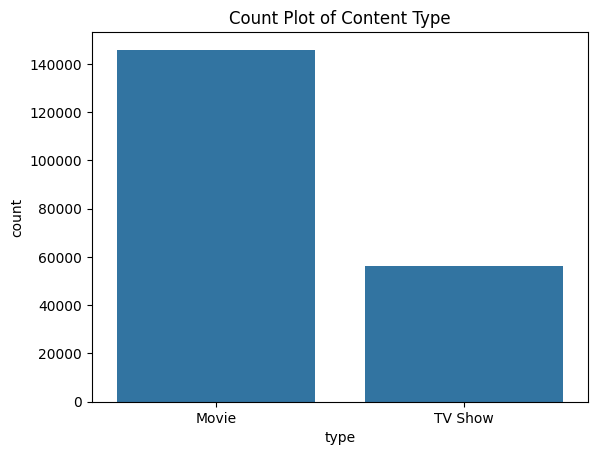

In [ ]:
sns.countplot(x='type', data=df)
plt.title('Count Plot of Content Type')
plt.show()

In [ ]:
top_countries = df['country'].value_counts().head(10).index
top_countries

Index(['United States', 'India', 'United Kingdom', 'Unknown Country', 'Japan',
       'France', 'Canada', 'Spain', 'South Korea', 'Germany'],
      dtype='object', name='country')

In [ ]:
filtered_df = df[df['country'].isin(top_countries)]

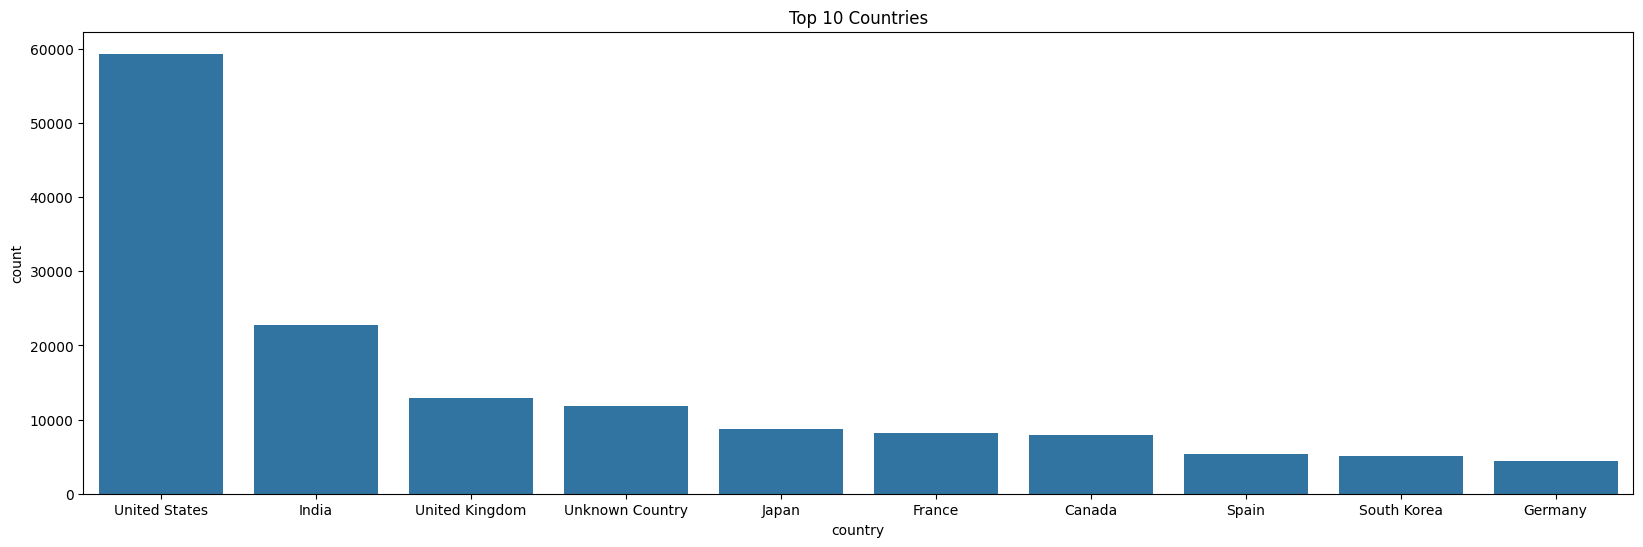

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(data=filtered_df, x='country', order=top_countries)
plt.title('Top 10 Countries')
plt.show()

In [ ]:
top_genres=df['listed_in'].value_counts().head(10).index
top_genres

Index([' International Movies', 'Dramas', 'Comedies', 'Action & Adventure',
       ' Dramas', ' Independent Movies', 'Children & Family Movies',
       ' TV Dramas', 'International TV Shows', ' Comedies'],
      dtype='object', name='listed_in')

In [ ]:
filtered_df1=df[df['listed_in'].isin(top_genres)]

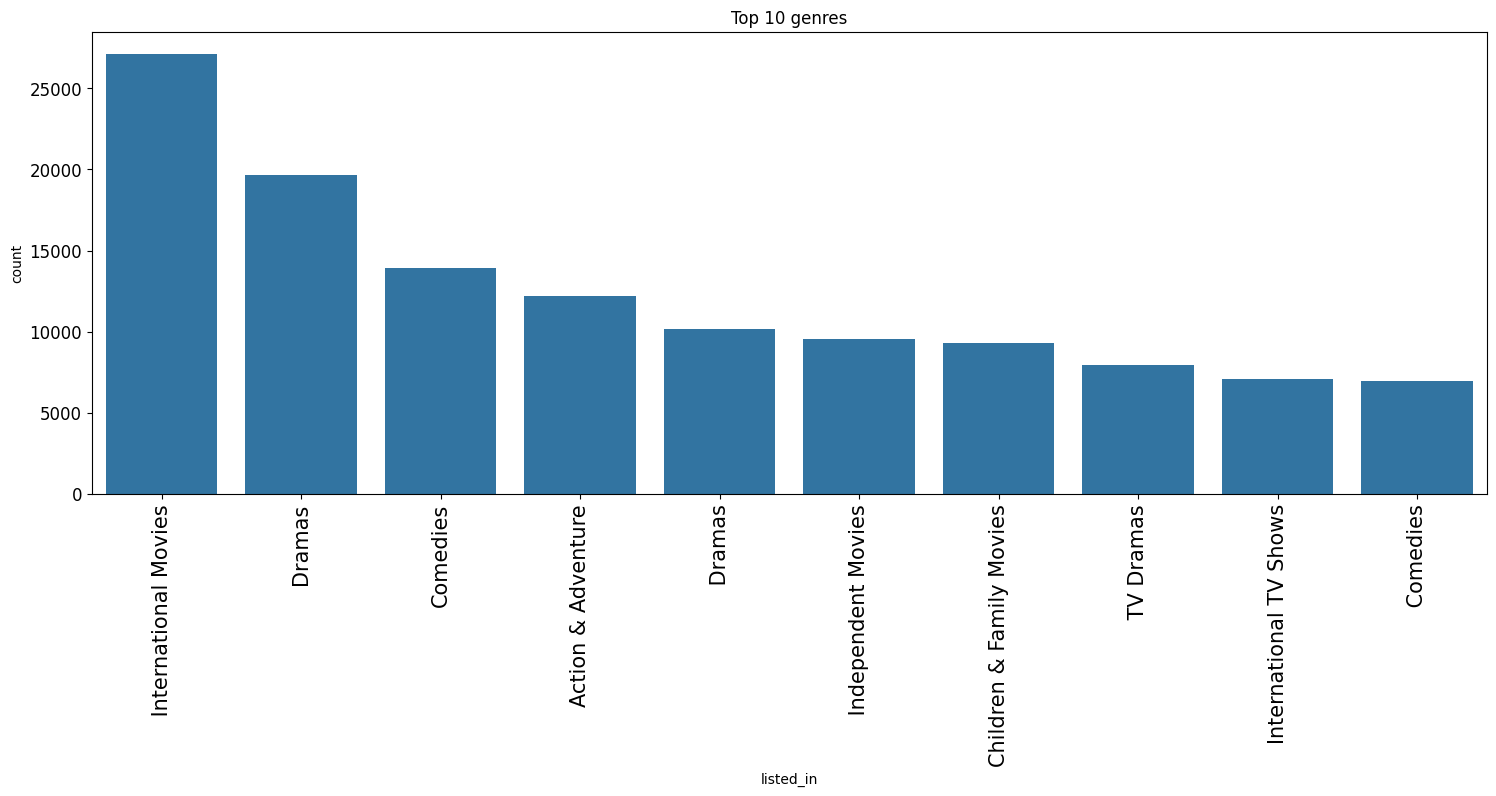

In [ ]:
plt.figure(figsize=(18,6))
plt.xticks(rotation =90)
sns.countplot(data=filtered_df1,x='listed_in', order=top_genres)
plt.title('Top 10 genres')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
top10_director=df['director'].value_counts().head(10).index
top10_director

Index(['Unknown Director', 'Martin Scorsese', 'Youssef Chahine',
       'Cathy Garcia-Molina', 'Steven Spielberg', 'Lars von Trier',
       'Raja Gosnell', 'Tom Hooper', 'McG', 'David Dhawan'],
      dtype='object', name='director')

In [ ]:
filtered_df2=df[df['director'].isin(top10_director)]
filtered_df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,Unknown Director,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201938,s8801,TV Show,Zindagi Gulzar Hai,Unknown Director,Javed Sheikh,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,TV Dramas,"Strong-willed, middle-class Kashaf and carefre..."
201939,s8801,TV Show,Zindagi Gulzar Hai,Unknown Director,Hina Khawaja Bayat,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,TV Dramas,"Strong-willed, middle-class Kashaf and carefre..."
202006,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Cast,Unknown Country,"July 1, 2019",2018,TV-Y7,2 Seasons,Kids' TV,"While living alone in a spooky town, a young g..."
202007,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Cast,Unknown Country,"July 1, 2019",2018,TV-Y7,2 Seasons,Korean TV Shows,"While living alone in a spooky town, a young g..."


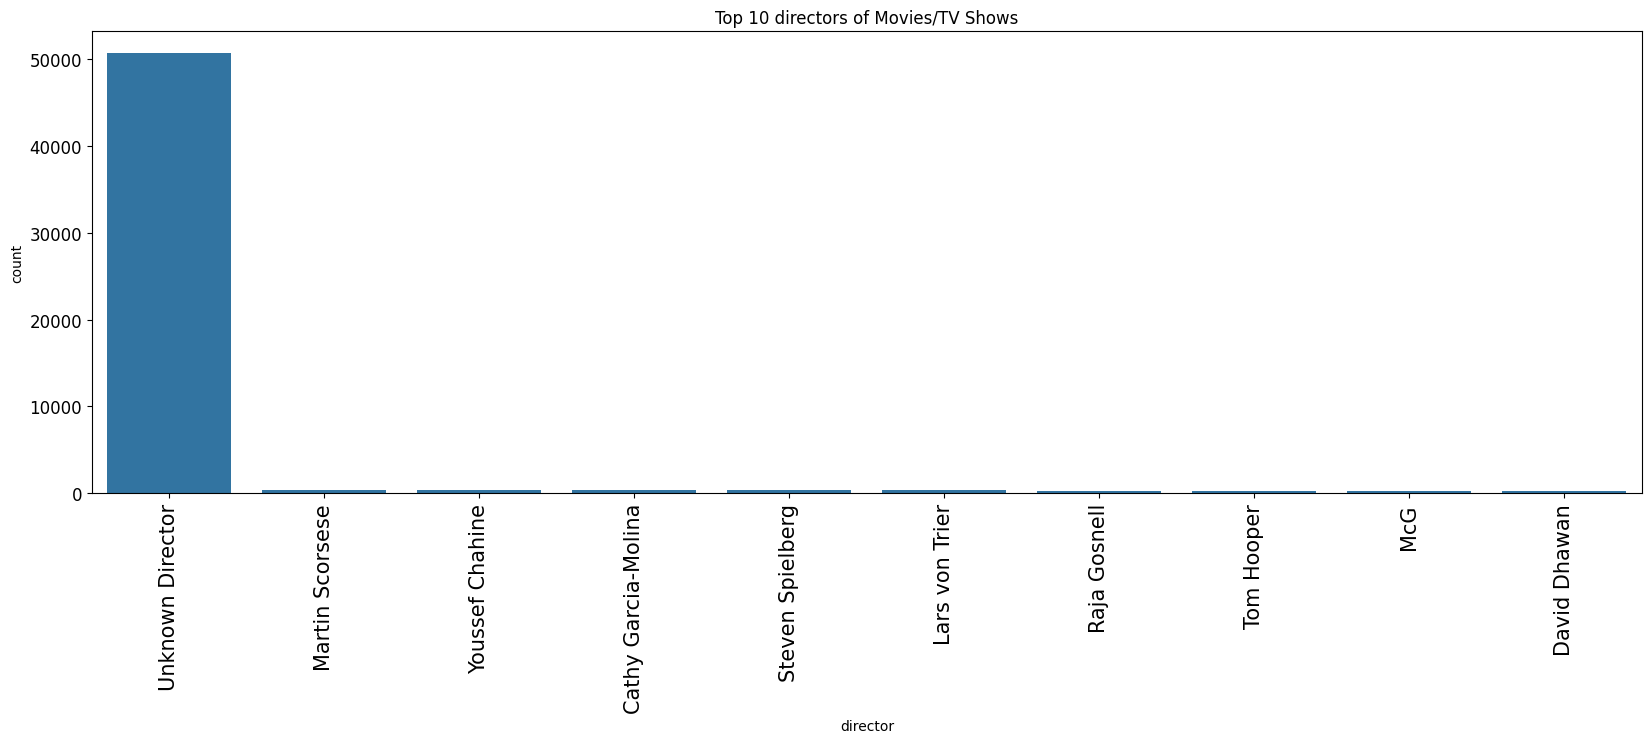

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(data=filtered_df2, x='director', order=top10_director)
plt.title('Top 10 directors of Movies/TV Shows')
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.show()

As, we can see the count of unknown directors is the highest.
We have one Indian director also in Top 10 which is David Dhawan.

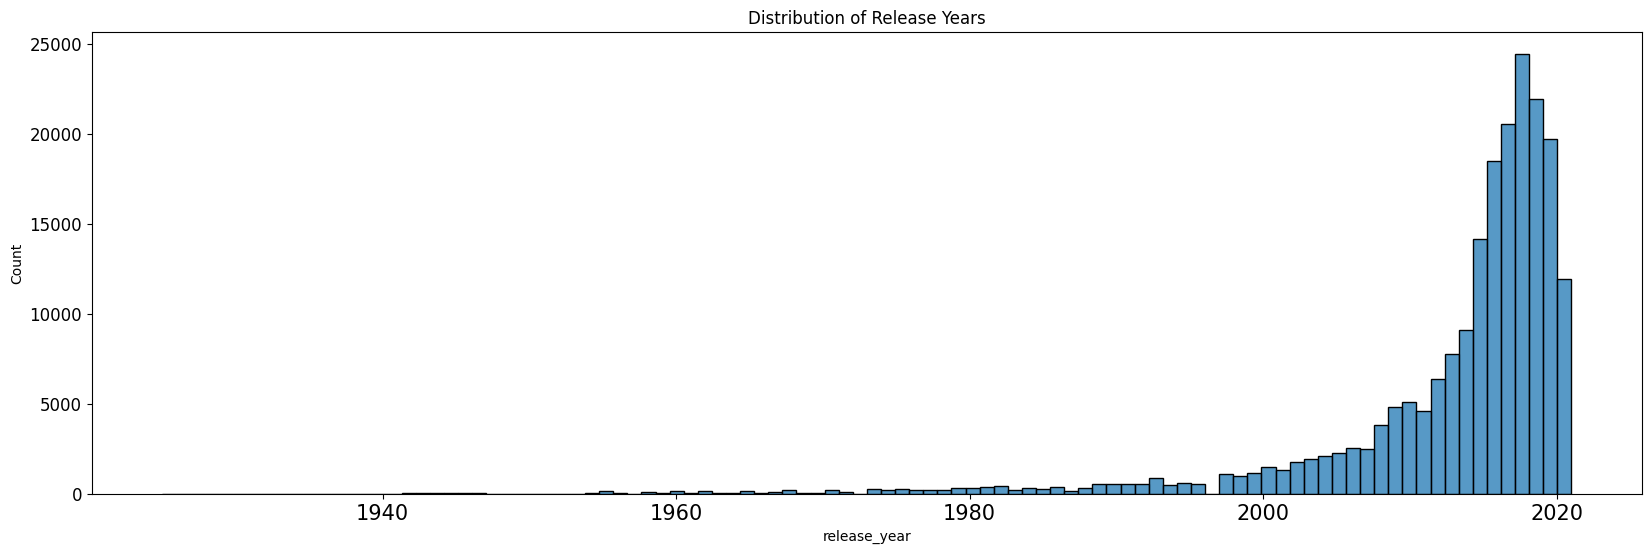

In [ ]:
plt.figure(figsize=(20,6))
sns.histplot(df['release_year'], bins=100)
plt.title('Distribution of Release Years')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.show()

We can see here that more number of TV shows and movies have been produced/released between 2015 and 2020.

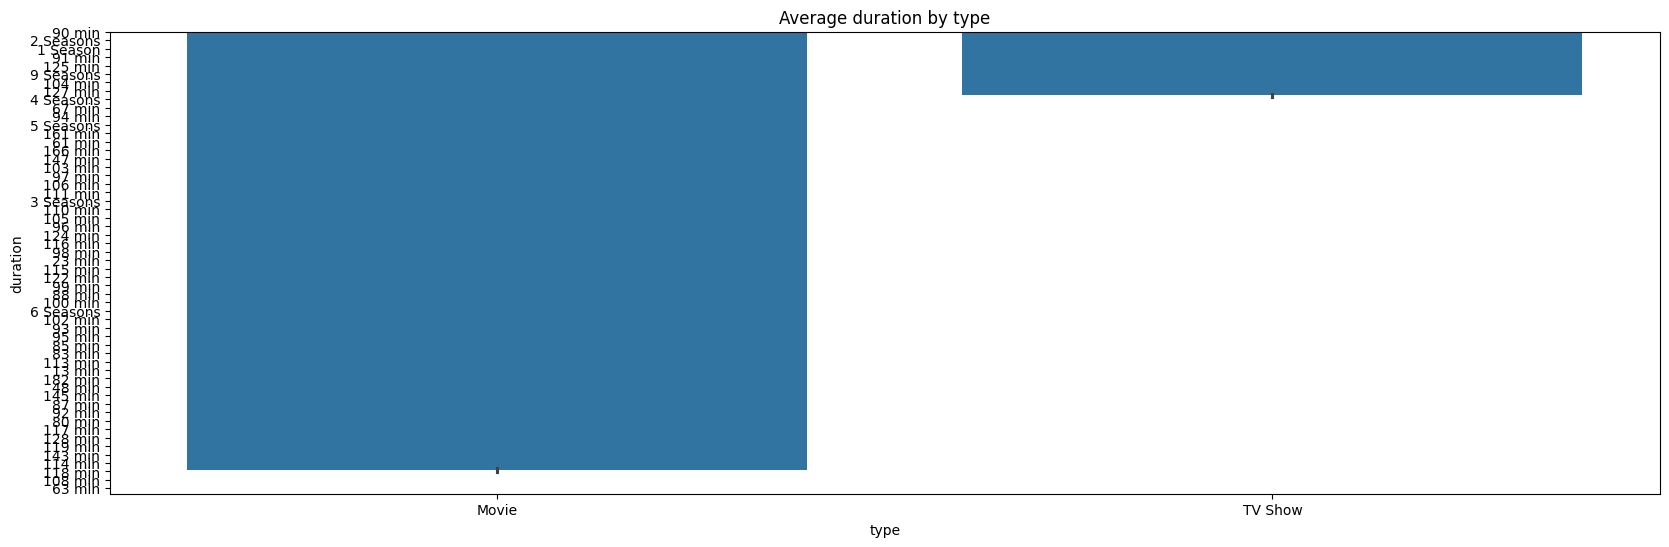

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x='type', y='duration', data=df, estimator=np.mean)
plt.title('Average duration by type')

plt.show()


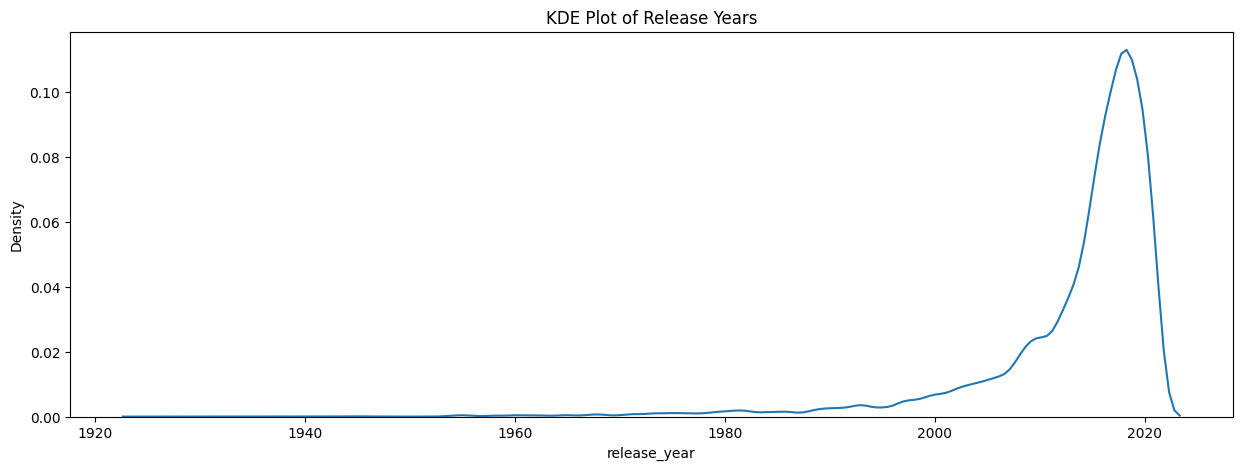

In [ ]:
plt.figure(figsize=(15,5))
sns.kdeplot(df['release_year'])

plt.title('KDE Plot of Release Years')
plt.show()


# 2. Comparison of tv shows vs. movies.
# a. Find the number of movies produced in each country and pick the top 10
# countries.

In [ ]:
df_movie=df[df['type']=='Movie']
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown Country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
160,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown Country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,Unknown Country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
162,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,Unknown Country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...


In [ ]:
top10_country=df_movie.groupby('country')[['title']].nunique().sort_values('title', ascending=False).head(10)
top10_country

,title
country,
United States,2752
India,962
United Kingdom,534
Unknown Country,440
Canada,319
France,303
Germany,182
Spain,171
Japan,119


United States is the country which has the count of maximum unique movies.

**b. Find the number of Tv-Shows produced in each country and pick the top 10 countries.**

In [ ]:
df_tvshow=df[df['type']=="TV Show"]
df_tvshow

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,Unknown Director,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201938,s8801,TV Show,Zindagi Gulzar Hai,Unknown Director,Javed Sheikh,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,TV Dramas,"Strong-willed, middle-class Kashaf and carefre..."
201939,s8801,TV Show,Zindagi Gulzar Hai,Unknown Director,Hina Khawaja Bayat,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,TV Dramas,"Strong-willed, middle-class Kashaf and carefre..."
202006,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Cast,Unknown Country,"July 1, 2019",2018,TV-Y7,2 Seasons,Kids' TV,"While living alone in a spooky town, a young g..."
202007,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Cast,Unknown Country,"July 1, 2019",2018,TV-Y7,2 Seasons,Korean TV Shows,"While living alone in a spooky town, a young g..."


In [ ]:
top10_country_tvshow= df_tvshow.groupby('country')[['title']].nunique().sort_values('title', ascending=False).head(10)
top10_country_tvshow

,title
country,
United States,938
Unknown Country,391
United Kingdom,272
Japan,199
South Korea,170
Canada,126
France,90
India,84
Taiwan,70


The country with the maximum count of unique TV Shows is United States. So, we can see, US has maximum count of movies and TV shows.
Also, we can see that South Korea is at rank 5 in this list, which means that south korean TV shows are also very poplular.

# **3. What is the best time to launch a TV show?**
# a. Find which is the best week to release the Tv-show or the movie. Do the analysis
# separately for Tv-shows and Movies

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')


In [ ]:
df['week_number']=df['date_added'].dt.isocalendar().week

Analysis to find best week to release a movie.

In [ ]:
#Movie
movie_week=df[df['type']=='Movie']

In [ ]:
movie_week.groupby('week_number')[['title']].count().sort_values('title')

,title
week_number,
4,56
53,61
45,61
6,64
12,67
8,72
32,73
19,73
21,76


The number of releases of movies is lowest in week number 4, so week 4 is best week to release a movie as there is least competition in that week.

Now we have to find best week to launch a TV Show.

In [ ]:
tv_show_week=df[df['type']=='TV Show']

In [ ]:
tv_show_week.groupby('week_number')[['title']].count().sort_values('title')

,title
week_number,
16,524
43,566
28,583
2,585
3,599
6,613
47,678
30,728
41,742


The number of releases of movies is lowest in week number 16, so week 16 is best week to release a TV Show as there is least competition in that week.

# b. Find which is the best month to release the Tv-show or the movie. Do the
# analysis separately for Tv-shows and Movies

In [ ]:
df['month']=df['date_added'].dt.month

analysis to find best month to release a movie.

In [ ]:
# For movies
movie_month=df[df['type']=='Movie']

In [ ]:
movie_month.groupby('month')[['title']].count().sort_values('title').reset_index()

,month,title
0,2.0,9137
1,5.0,9579
2,11.0,11065
3,3.0,11507
4,6.0,11616
5,8.0,11924
6,4.0,12538
7,12.0,12768
8,9.0,13220
9,10.0,13541


As we can clearly see, that 2nd month i.e. February is the month where least number of movies are released, so 2nd month is best month to release a movie as there is least competition in that month.

In [ ]:
# for TV shows
tv_show_month=df[df['type']=='TV Show']

In [ ]:
tv_show_month.groupby('month')[['title']].count().sort_values('title').reset_index()

,month,title
0,2.0,3786
1,1.0,3941
2,5.0,4111
3,10.0,4199
4,3.0,4201
5,11.0,4428
6,4.0,4460
7,9.0,4818
8,6.0,4959
9,8.0,5029


As we can clearly see, that 2nd month i.e. February is the month where least number of TV shows are released, so 2nd month is best month to release a TV show as there is least competition in that month.

# **4. Analysis of actors/directors of different types of shows/movies.**

**a. Identify the top 10 directors who have appeared in most movies or TV shows.**




In [ ]:
#FOR Movies
movies_dir=df[df['type']=='Movie']
movies_dir.reset_index(drop=True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_number,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9.0
1,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0
2,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0
3,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0
4,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145912,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0
145913,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0
145914,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0
145915,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0


In [ ]:
mov_count=movies_dir.groupby('director')['title'].nunique().reset_index(name='unique_title_count')
mov_count

,director,unique_title_count
0,Aaron Moorhead,2
1,Aaron Woolf,1
2,Abbas Alibhai Burmawalla,1
3,Abdullah Al Noor,1
4,Abhinav Shiv Tiwari,1
...,...,...
4882,Çagan Irmak,1
4883,Ísold Uggadóttir,1
4884,Óskar Thór Axelsson,1
4885,Ömer Faruk Sorak,2


In [ ]:
top10_director=mov_count.sort_values('unique_title_count', ascending=False).head(10)
top10_director

,director,unique_title_count
4677,Unknown Director,188
3818,Rajiv Chilaka,22
3865,Raúl Campos,18
234,Jan Suter,18
4429,Suhas Kadav,16
2308,Jay Karas,15
3067,Marcus Raboy,15
1289,Cathy Garcia-Molina,13
2305,Jay Chapman,12
3135,Martin Scorsese,12


These are the top 10 directors for movies along with their unique title count sorted in descending order.

In [ ]:
#Now TOP 10 Directors for TV Shows
tvshow_dir=df[df['type']=='TV Show']

In [ ]:
tvshow_count=tvshow_dir.groupby('director')['title'].nunique().reset_index(name='unique_title_count')
tvshow_count

,director,unique_title_count
0,Abhishek Chaubey,1
1,Aco Tenriyagelli,1
2,Alan Poul,1
3,Alban Teurlai,1
4,Andrés Beltrán,1
...,...,...
296,Vijay S. Bhanushali,1
297,Vikramaditya Motwane,1
298,Wouter Bouvijn,1
299,Yasuhiro Irie,1


In [ ]:
tvshow_count.sort_values('unique_title_count', ascending=False).head(10)

,director,unique_title_count
292,Unknown Director,2446
187,Ken Burns,3
86,Alastair Fothergill,3
255,Rob Seidenglanz,2
265,Shin Won-ho,2
183,Jung-ah Im,2
272,Stan Lathan,2
24,Gautham Vasudev Menon,2
173,Joe Berlinger,2
153,Hsu Fu-chun,2


These are the top 10 directors for TV Shows along with their unique title count sorted in descending order.

# **b. Identify the top 10 actors who have appeared in most movies or TV shows.**

In [ ]:
# For Movies
actor_mov=df[df['type']=='Movie']
actor_mov

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_number,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9.0
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0
160,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0
162,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0
202061,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0
202062,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0
202063,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0


In [ ]:
actor_count=actor_mov.groupby('cast')['title'].nunique().reset_index(name='unique_title_count')
actor_count

,cast,unique_title_count
0,Jr.,1
1,"""Riley"" Lakdhar Dridi",1
2,'Najite Dede,1
3,2Mex,1
4,50 Cent,4
...,...,...
27875,Çetin Tekindor,1
27876,Úrsula Corberó,1
27877,İbrahim Büyükak,1
27878,Şahin Irmak,1


In [ ]:
actor_count.sort_values('unique_title_count', ascending=False).head(10)

,cast,unique_title_count
27674,Unknown Cast,475
1946,Anupam Kher,38
16781,Om Puri,27
19235,Rupa Bhimani,27
27291,Shah Rukh Khan,26
17025,Paresh Rawal,25
3109,Boman Irani,25
11219,Julie Tejwani,24
24247,Akshay Kumar,23
18089,Rajesh Kava,21


These are the top 10 actors for movies along with their unique title count sorted in descending order. Here , we can see that many Indian Actors are present in this list.

Now For TV Shows

In [ ]:
actor_tvshow=df[df['type']=='TV Show']
actor_tvshow

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_number,month
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9.0
2,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9.0
3,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9.0
4,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9.0
5,s2,TV Show,Blood & Water,Unknown Director,Dillon Windvogel,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,s8801,TV Show,Zindagi Gulzar Hai,Unknown Director,Javed Sheikh,Pakistan,2016-12-15,2012,TV-PG,1 Season,TV Dramas,"Strong-willed, middle-class Kashaf and carefre...",50,12.0
201939,s8801,TV Show,Zindagi Gulzar Hai,Unknown Director,Hina Khawaja Bayat,Pakistan,2016-12-15,2012,TV-PG,1 Season,TV Dramas,"Strong-willed, middle-class Kashaf and carefre...",50,12.0
202006,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Cast,Unknown Country,2019-07-01,2018,TV-Y7,2 Seasons,Kids' TV,"While living alone in a spooky town, a young g...",27,7.0
202007,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Cast,Unknown Country,2019-07-01,2018,TV-Y7,2 Seasons,Korean TV Shows,"While living alone in a spooky town, a young g...",27,7.0


In [ ]:
actor_tvshow_count=actor_tvshow.groupby('cast')['title'].nunique().reset_index(name='unique_title_count')
actor_tvshow_count

,cast,unique_title_count
0,Jr.,1
1,2 Chainz,1
2,A Boogie Wit tha Hoodie,1
3,A.D. Miles,3
4,A.J. Cook,1
...,...,...
15497,Çağatay Ulusoy,1
15498,Öykü Karayel,1
15499,Úrsula Corberó,1
15500,İbrahim Çelikkol,1


In [ ]:
actor_tvshow_count.sort_values('unique_title_count', ascending=False).head(10)

,cast,unique_title_count
15362,Unknown Cast,350
11974,Takahiro Sakurai,24
13204,Yuki Kaji,17
6136,Junichi Suwabe,17
222,Ai Kayano,17
2573,Daisuke Ono,14
13923,David Attenborough,14
11989,Takehito Koyasu,13
13125,Yoshimasa Hosoya,13
13188,Yuichi Nakamura,13


These are the top 10 actos for TV Shows along with their unique title count sorted in descending order.

# **5. Which genre movies are more popular or produced more**

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
df['listed_in']  # this is our genre column.

0                  Documentaries
1         International TV Shows
2         International TV Shows
3         International TV Shows
4         International TV Shows
                   ...          
202060          Music & Musicals
202061          Music & Musicals
202062          Music & Musicals
202063          Music & Musicals
202064          Music & Musicals
Name: listed_in, Length: 202065, dtype: object

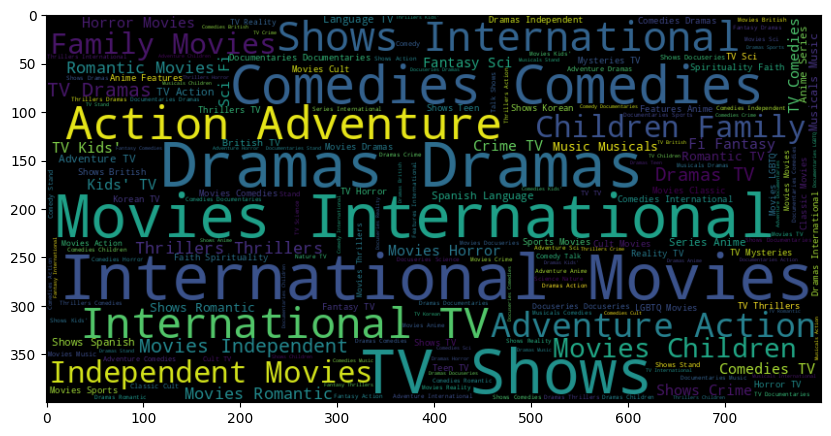

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='black')
wordcloud.generate(' '.join(df['listed_in']))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

# **6. Find After how many days the movie will be added to Netflix after the release of**
# **the movie (you can consider the recent past data)**

In [ ]:
movies_x=df[df['type']=="Movie"]
movies_x

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_number,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9.0
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0
160,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0
162,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0
202061,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0
202062,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0
202063,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0


In [ ]:
movies_x['release_date']=pd.to_datetime(movies_x['release_year'],format='%Y', errors='coerce')

<ipython-input-87-ead24b06f97c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_x['release_date']=pd.to_datetime(movies_x['release_year'],format='%Y', errors='coerce')


In [ ]:
movies_x

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_number,month,release_date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9.0,2020-01-01
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0,2021-01-01
160,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0,2021-01-01
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0,2021-01-01
162,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0,2015-01-01
202061,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0,2015-01-01
202062,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0,2015-01-01
202063,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0,2015-01-01


In [ ]:
days_to_add=(movies_x['date_added']-movies_x['release_date']).dt.days
days_to_add

0          633
159        266
160        266
161        266
162        266
          ... 
202060    1521
202061    1521
202062    1521
202063    1521
202064    1521
Length: 145917, dtype: int64

In [ ]:
days_to_add.mode().iloc[0]

1369

Here, the goal is to understand the typical delay in days from when a movie is released to when it becomes available on Netflix. So, it is 1369 days for movies that after 1369 daysys of its release, it becomes available on Netflix.

In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_number,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9.0
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9.0


# **Does Netflix has more focus on TV Shows than movies in recent years**

In [ ]:
df['year_added']=df['date_added'].dt.year
df['year_added']

0         2021.0
1         2021.0
2         2021.0
3         2021.0
4         2021.0
           ...  
202060    2019.0
202061    2019.0
202062    2019.0
202063    2019.0
202064    2019.0
Name: year_added, Length: 202065, dtype: float64

Since, we have to do exploartion for recent years, I am consider data from year 2010 onwards.

In [ ]:
data_2010=df[df['release_year']>=2010]
data_2010

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_number,month,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9.0,2021.0
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9.0,2021.0
2,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9.0,2021.0
3,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9.0,2021.0
4,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0,2019.0
202061,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0,2019.0
202062,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0,2019.0
202063,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3.0,2019.0


In [ ]:
type_year_counts=data_2010.groupby(['year_added', 'type']).size().reset_index(name='count')
type_year_counts

,year_added,type,count
0,2011.0,Movie,72
1,2012.0,Movie,36
2,2013.0,Movie,75
3,2013.0,TV Show,62
4,2014.0,Movie,313
5,2014.0,TV Show,102
6,2015.0,Movie,1125
7,2015.0,TV Show,199
8,2016.0,Movie,4656
9,2016.0,TV Show,2603


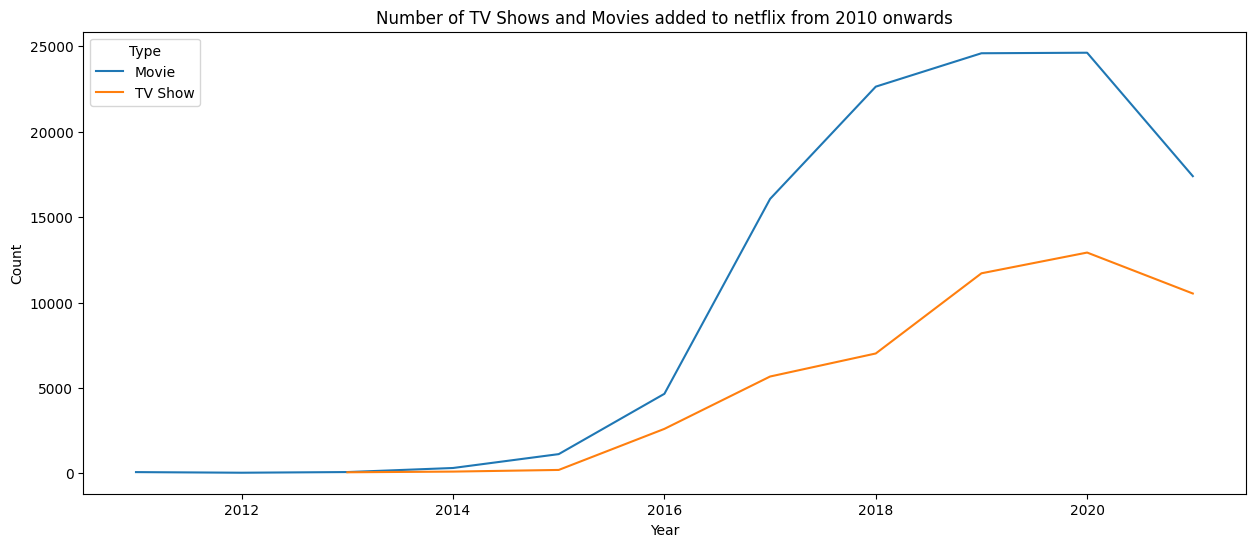

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(data=type_year_counts, x='year_added', y='count', hue='type')
plt.title('Number of TV Shows and Movies added to netflix from 2010 onwards')
plt.xlabel("Year")
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()



# **As we can see graph that the count of movies always high the TV shows but Netflix has certainly focused more on TV Shows because according to the dataset first TV Show was released in year 2008 on Netflix and since then a large number of TV Shows have been released over the recent past years.**

# **Understanding what content is available in different countries**

In [ ]:
country_genre=pd.crosstab(df['country'],df['listed_in'])
country_genre

listed_in,Anime Features,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,...,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Sci-Fi & Fantasy,TV Shows,Thrillers
country,,,,,,,,,,,,,,,,,,,,,
,0,0,0,0,0,0,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,11,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vatican City,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Venezuela,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vietnam,0,0,0,0,6,0,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0


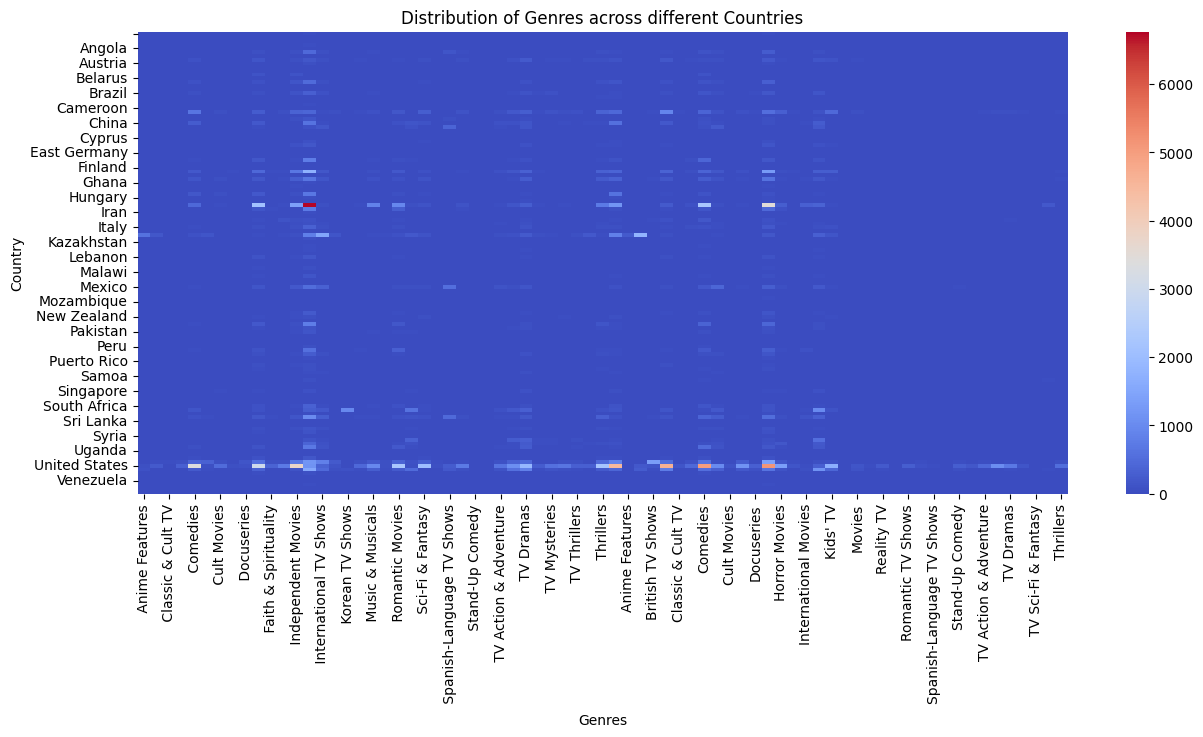

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(country_genre,cmap='coolwarm')
plt.title('Distribution of Genres across different Countries')
plt.xlabel('Genres')
plt.ylabel('Country')
plt.show()